# Projet 5 - Optimisez la gestion des données d'une boutique avec R ou Python - OpenClassrooms

## Importations des bibliothèques et fichiers correspondants

In [1]:
import numpy as np #On importe les bibliothèques correspondantes ainsi que le module Re
import pandas as pd
import seaborn as sns
import re
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
erp = pd.read_excel("erp.xlsx") #On importe les fichiers Excel correspondants à savoir erp,...
liaison = pd.read_excel("liaison.xlsx") #liaison,...
web = pd.read_excel("web.xlsx") #et web.

C:\Users\nic_9\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Question 1 : Exploration et nettoyage des données puis fusion des DataFrames

### Dans un premier temps, on s'intéressera au DataFrame web

In [3]:
#On vérifie le DataFrame web
#On explore les données du DF web
print(web.info())
#On affiche le DF web
print (web.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [4]:
#On vérifie le Dataframe web
#On voit qu'on a donc 1513 lignes et potentiellement 714 lignes à garder dans le cas où on supprimerai un maximum de lignes
#On cherche les doublons des données du DataFrame web par id
web.loc[web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
#On vérifie le Dataframe web
#On voit qu'il y a des doublons dont des liens de pièces jointes vers des images
#On recherche les valeurs manquantes
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [6]:
#On voit qu'il y a 799 lignes qui ne correspondent pas à des images sur les 1513 (au total) dont 85 qui ont des références vides
#On peut donc en déduire qu'il y a 714 produits dont les références ne sont pas vides
#On nettoie le DataFrame web 
#On supprime les doublons du DataFrame web qui ont la valeur "attachment" pour post_type donc garder ceux qui 
# ont la valeur "product" vu que attachment correspond à l'image du produit et que le post contient les informations 
# essentielles sur le produit
web.drop(web.loc[web['post_type']=='attachment'].index, inplace=True)
#On supprime les lignes où la valeur manquante est l'id car c'est la clé primaire sur laquelle on va joindre web à liaison
#Elle ne peut donc pas être nulle
web = web.dropna(subset=['sku'])
#On renomme la colonne sku en id_web car sku correspond à id_web d'après l'énoncé
web.rename(columns={"sku":"id_web"}, inplace=True)
#On affiche le DF web 
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
#On vérifie si notre hypothèse est juste en affichant le nombre de lignes de web
print(web.shape)

(714, 28)


### Puis on s'intéressera au DataFrame liaison

In [8]:
#On vérifie le DataFrame liaison
#On explore les données du DF liaison
print(liaison.info())
#On affiche le DF liaison
print (liaison.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
   product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815


In [9]:
#On vérifie le Dataframe liaison
#On voit qu'on a 734 valeurs id_web et 825 valeurs product_id donc normalement 91 valeurs vides pour id_web
#On cherche les doublons des données du DataFrame liaison par product_id
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

,product_id,id_web


In [10]:
#On vérifie le Dataframe liaison
#Pas de doublons au niveau de product_id
#On cherche les doublons des données du DataFrame liaison par id_web
liaison.loc[liaison['id_web'].duplicated(keep=False),:]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [11]:
#On vérifie le Dataframe liaison
#On voit qu'il y a des doublons de valeurs manquantes mais sans aucun autre doublon à priori
#On recherche les valeurs manquantes
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [12]:
#On nettoie le DataFrame liaison
#On a confirmation qu'il n'y a aucun doublon à part les valeurs vides
#On supprime les lignes où la valeur manquante est l'id_web car id_web est la clé primaire sur laquelle on va joindre
#web et liaison
liaison = liaison.dropna(subset=['id_web'])
#On revérifie les doublons pour le DF liaison sur id_web pour voir s'il y a d'autres doublons
liaison.loc[liaison['id_web'].duplicated(keep=False),:]

,product_id,id_web


In [13]:
#On nettoie le DataFrame liaison
#On peut afficher maintenant le DF liaison 
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Enfin, avant la fusion, on s'intéressera au DataFrame erp

In [14]:
#On vérifie le DataFrame erp
#On explore les données du DF erp
print(erp.info())
#On affiche le DF erp
print (erp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None
   product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
1        3849           1   34.3               0   outofstock
2        3850           1   20.8               0   outofstock
3        4032           1   14.1               0   outofstock
4        4039           1   46.0               0   outofstock


In [15]:
#On vérifie le DF erp 
#On cherche les doublons des données du DataFrame web par id
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [16]:
#On vérifie le DF erp
#On recherche les valeurs manquantes
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [17]:
#Pas besoin de nettoyer le DF erp
#On affiche donc le DF erp
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Fusion des 3 DataFrames 

In [18]:
#On fait les jointures entre erp et liaison puis entre erp_liaison et web (Inner Join), on a choisi ici un Inner Join 
# car on garde seulement les données dont les clés ici product_id et id_web sont présents dans les 3 tableaux pour avoir un 
#un jeu de données cohérent c'est-à-dire dont les vins ont leur références à la fois dans les stocks et sur le site
# web (on rappelle que l'Inner Join permet de retourner les données quand la condition est vraie dans les deux tables) 
#web a 714 lignes, liaison a 734 lignes, et erp a 825 lignes
erp_liaison = pd.merge(erp, liaison)
# On aurait pu écrire erp_liaison = pd.merge (erp, liaison, how="inner", on="product_id")
# Ici on aurait pu faire un fulljoin (appelé Outer en Python) on aurait pu récupérer une table erp_liaison avec 825 lignes 
# dont 91 avec des valeurs vides puisque ici peu importe s’il n’y a pas de lignes correspondantes dans l’une des deux tables,
# toutes les informations des deux tables sont présentes. C’est la jointure qui permet de garder le plus d’informations
# possibles.
# Ici on aurait pu aussi faire une jointure à gauche, dans ce cas, on aurait récupérer une table erp_liaison avec 825 lignes
# puisque c'est une jointure entre 2 tables qui permet de retourner tous les enregistrements de la table de gauche (ici erp)
# même s’il n’y a pas de correspondance avec la table de droite.
# Enfin on aurait pu faire une jointure à droite, dans ce cas, on aurait récupérer une table erp_liaison avec 734 lignes
# puisque c'est une jointure entre 2 tables qui permet de retourner tous les enregistrements de la table de gauche (ici liaison) 
# même s’il n’y a pas de correspondance avec la table de droite
# Dans le cas où les noms des clés sont identiques on aurait pu renseigner "on=product_id", s'ils auraient été différents, on 
# aurait du renseigner "left on=..." et "right on=..."
erp_web = pd.merge(erp_liaison, web)
# On aurait pu écrire erp_web = pd.merge (erp_liaison, web, how="inner", on="id_web")
# Ici on aurait pu faire un fulljoin (appelé Outer en Python) on aurait pu récupérer une table erp_web avec 734 lignes 
# dont 20 avec des valeurs vides puisque ici peu importe s’il n’y a pas de lignes correspondantes dans l’une des deux tables,
# toutes les informations des deux tables sont présentes. C’est la jointure qui permet de garder le plus d’informations
# possibles.
# Ici on aurait pu aussi faire une jointure à gauche, dans ce cas, on aurait récupérer une table erp_web avec 734 lignes
# puisque c'est une jointure entre 2 tables qui permet de retourner tous les enregistrements de la table de gauche 
# (ici erp_liaison) même s’il n’y a pas de correspondance avec la table de droite.
# Enfin on aurait pu faire une jointure à droite, dans ce cas,on aurait récupérer une table erp_web avec 714 lignes
# puisque c'est une jointure entre 2 tables qui permet de retourner tous les enregistrements de la table de gauche (ici liaison) 
# même s’il n’y a pas de correspondance avec la table de droite
# Dans le cas où les noms des clés sont identiques on aurait pu renseigner "on=id_web", s'ils auraient été différents, on 
# aurait du renseigner "left on=..." et "right on=..."
#On affiche erp_web
erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
#On vérifie qu'on a bien 714 lignes
print(erp_web.shape)

(714, 33)


## Question 2 : Calcul du Chiffre d'Affaires par produit puis calcul du total du CA

### Calcul du CA par produit

In [20]:
#On calcule le CA par produit
erp_web['CA_product'] = erp_web['price']*erp_web['total_sales']
#On affiche les CA par produit trouvés
erp_web['CA_product']

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
709     42.0
710      0.0
711      0.0
712      0.0
713      0.0
Name: CA_product, Length: 714, dtype: float64

In [21]:
#On affiche les 20 premiers CA par produit
erp_web.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA_product
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
5,4040,1,34.3,0,outofstock,15303,0,0,0,0.0,...,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
6,4041,1,32.7,15,instock,14975,0,0,0,0.0,...,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
7,4042,1,31.2,34,instock,16042,0,0,0,0.0,...,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,218.4
8,4043,1,60.0,12,instock,14980,0,0,0,0.0,...,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,180.0
9,4045,1,42.6,66,instock,16041,0,0,0,0.0,...,2020-08-03 09:55:03,2020-08-03 07:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,596.4


### Calcul du CA total

In [22]:
#On additionne les CA par produit pour trouver le CA total
CA_total = erp_web["CA_product"].sum()
#On imprime 
print("Le Chiffre d'Affaires total est de", round(CA_total,2) , "€.")

Le Chiffre d'Affaires total est de 70568.6 €.


## Question 3 : Détection des valeurs aberrantes

### Méthode 1 : L'écart inter-quartile

In [23]:
#Pour la détection des outliers, on peut dans un premier temps utiliser describe
erp_web.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,CA_product
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


In [24]:
#On calcule les quartiles et l'écart interquartile
Q1 = np.percentile(erp_web['price'], 25, interpolation = 'midpoint')
print("Le quartile Q1 vaut", round(Q1), ".")
Q3 = np.percentile(erp_web['price'], 75, interpolation = 'midpoint')
print("Le quartile Q3 vaut", round(Q3), ".")
IQR = Q3 - Q1
print("L'IQR (Inter Quartile Range) vaut", round(IQR), ".")


Le quartile Q1 vaut 14 .
Le quartile Q3 vaut 42 .
L'IQR (Inter Quartile Range) vaut 28 .


In [25]:
#On cherche d'éventuelles valeurs aberrantes faibles
erp_web [erp_web.price <= Q1-1.5*IQR][['id_web', 'product_id', 'price', 'post_title']]

,id_web,product_id,price,post_title


In [26]:
#On cherche d'éventuelles  valeurs aberrantes élevées
erp_web [erp_web.price >= Q3+1.5*IQR][['id_web', 'product_id', 'price', 'post_title']].sort_values(by='price', ascending=True)

,id_web,product_id,price,post_title
205,13853,4359,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
438,13913,5026,86.8,Champagne Agrapart &amp; Fils Minéral Extra Br...
65,11668,4132,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
502,19822,5565,92.0,Tempier Bandol Cabassaou 2017
602,14774,5916,93.0,Wemyss Malts Single Cask Scotch Whisky Chocola...
655,11601,6214,99.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...
63,15382,4115,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
380,14805,4903,102.3,Domaine Des Croix Corton Grand Cru Les Grèves ...
222,3509,4407,104.0,Cognac Frapin Cigar Blend
432,11602,5008,105.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...


### Méthode 2 : Le Z-Score

In [27]:
#Calcul du Z-score et liste des outliers
#On va calculer d'abord...
threshold = 2 # le seuil
mean = np.mean(erp_web.price) # moyenne
std = np.std(erp_web.price) # écart-type

print("La moyenne est", round(mean), ".")
print("L'écart-type est", round(std), ".")
outlier=[]
for i in erp_web.price:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
# détermination du seuil de prix
# (x-mean) /std = 2
# x-mean = 2*std
# X = 2*std + mean
seuil = 2*std + mean
print("Le seuil de prix est", round(seuil), ".")
print('La liste des outliers est', outlier)


La moyenne est 32 .
L'écart-type est 28 .
Le seuil de prix est 88 .
La liste des outliers est [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


### Représentation des outliers 

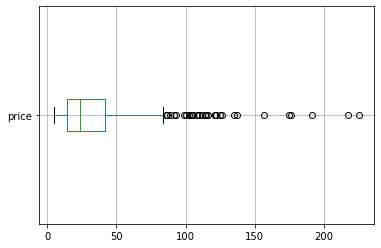

In [28]:
#On représente les valeurs atypiques à l'aide d'un box plot
erp_web.boxplot(column="price", vert=False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

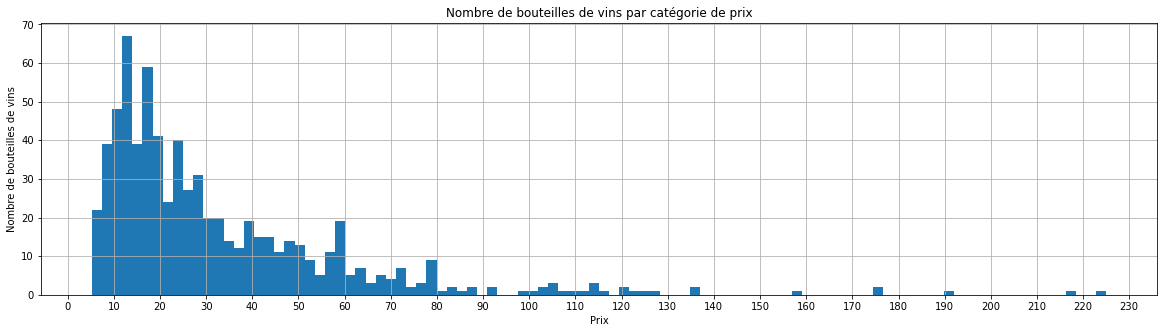

In [29]:
#On utilise un graphique en histogramme pour montrer les valeurs aberrantes
plt.figure(figsize=(20,5))
erp_web['price'].hist(density=False, bins=100)
plt.ylabel('Nombre de bouteilles de vins')
plt.xlabel('Prix')
plt.title('Nombre de bouteilles de vins par catégorie de prix')
graduation = [10*i for i in range(24)]
plt.xticks(graduation)

plt.show

In [73]:
erp_web_outliers = erp_web [erp_web.price >= Q3+1.5*IQR][['id_web', 'product_id', 'price', 'post_title', 'CA_product', 'total_sales' ]].sort_values(by='price', ascending=True)
erp_web_outliers['% du CA'] = (erp_web_outliers['CA_product']/CA_total)*100
erp_web_outliers.head(32)


,id_web,product_id,price,post_title,CA_product,total_sales,% du CA
205,13853,4359,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6,1.0,0.121300
438,13913,5026,86.8,Champagne Agrapart &amp; Fils Minéral Extra Br...,0.0,0.0,0.000000
65,11668,4132,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0,0.0,0.000000
502,19822,5565,92.0,Tempier Bandol Cabassaou 2017,0.0,0.0,0.000000
602,14774,5916,93.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,0.0,0.0,0.000000
655,11601,6214,99.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,0.0,0.0,0.000000
63,15382,4115,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0,0.0,0.000000
380,14805,4903,102.3,Domaine Des Croix Corton Grand Cru Les Grèves ...,0.0,0.0,0.000000
222,3509,4407,104.0,Cognac Frapin Cigar Blend,104.0,1.0,0.147374
432,11602,5008,105.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,0.0,0.000000
